In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat

In [35]:
def find_closest_centroids(X,centroids):
    m=X.shape[0]
    k=centroids.shape[0]
    idx=np.zeros(m)
    
    for i in range(m):
        min_dist=100000
        for j in range(k):
            dist=np.sum((X[i,:]-centroids[j,:])**2)
            if dist<min_dist:
                min_dist=dist
                idx[i]=j
    return idx

In [36]:
data=loadmat("E:/andrew machine learning/andrew_ml_ex78376/ex7data2.mat")
X=data["X"]
initial_centroids=initial_centroids=np.array([[3, 3], [6, 2], [8, 5]])

In [37]:
idx=find_closest_centroids(X, initial_centroids)
idx[0:3]

array([0., 2., 1.])

In [38]:
data2=pd.DataFrame(data["X"],columns=["X1","X2"])
data2.head()

,X1,X2
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


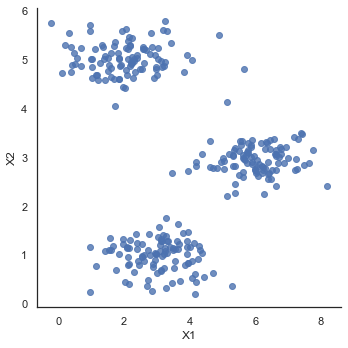

In [39]:
sns.set(context="notebook",style="white")
sns.lmplot("X1","X2",data=data2,fit_reg=False)
plt.show()

In [40]:
def compute_centroids(X,idx,k):
    m,n=X.shape
    centroids=np.zeros((k,n))
    for i in range(k):
        indices=np.where(idx == i)
        centroids[i,:]=(np.sum(X[indices,:],axis=1)/len(indices[0])).ravel()
    return centroids

In [41]:
compute_centroids(X, idx, 3)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [42]:
def run_k_means(X,initial_centroids,max_iters):
    m,n=X.shape
    k=initial_centroids.shape[0]
    idk=np.zeros(m)
    centroids=initial_centroids
    for i in range(max_iters):
        idx=find_closest_centroids(X,centroids)
        centroids=compute_centroids(X,idx,k)
    return idx,centroids

In [43]:
idx, centroids = run_k_means(X, initial_centroids, 10)

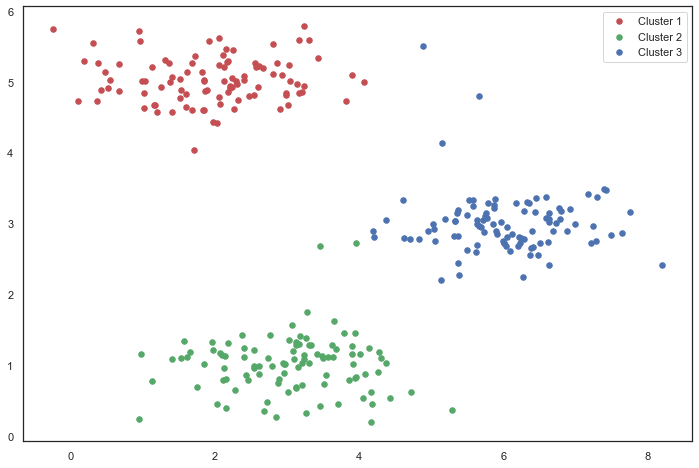

In [44]:
cluster1=X[np.where(idx==0)[0],:]
cluster2=X[np.where(idx==1)[0],:]
cluster3=X[np.where(idx==2)[0],:]

fig,ax=plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0],cluster1[:,1],s=30,color='r',label='Cluster 1')
ax.scatter(cluster2[:,0],cluster2[:,1],s=30,color='g',label='Cluster 2')
ax.scatter(cluster3[:,0],cluster3[:,1],s=30,color='b',label='Cluster 3')
ax.legend()
plt.show()

In [45]:
def init_centroids(X,k):
    m,n=X.shape
    centroids=np.zeros((k,n))
    idx=np.random.randint(0,m,k)
    for i in range(k):
        centroids[i,:]=X[idx[i],:]
    return centroids

In [46]:
init_centroids(X, 3)

array([[6.77012767, 3.21411422],
       [6.20295231, 2.67856179],
       [6.88575584, 2.88845269]])

In [47]:
idx, centroids = run_k_means(X, initial_centroids, 10)

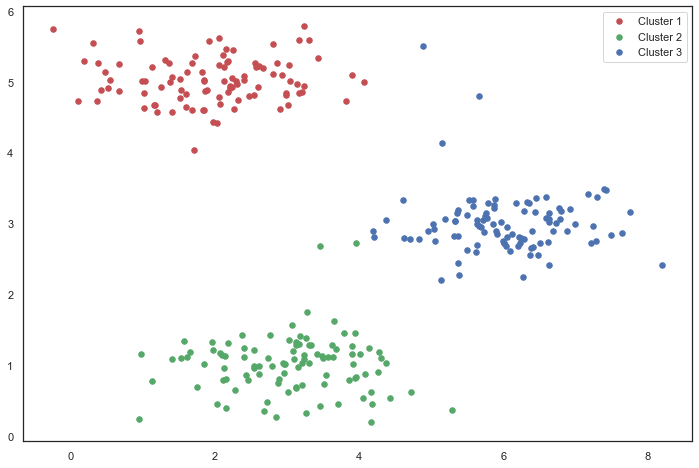

In [48]:
cluster1=X[np.where(idx==0)[0],:]
cluster2=X[np.where(idx==1)[0],:]
cluster3=X[np.where(idx==2)[0],:]

fig,ax=plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0],cluster1[:,1],s=30,color='r',label='Cluster 1')
ax.scatter(cluster2[:,0],cluster2[:,1],s=30,color='g',label='Cluster 2')
ax.scatter(cluster3[:,0],cluster3[:,1],s=30,color='b',label='Cluster 3')
ax.legend()
plt.show()

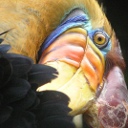

In [49]:
from IPython.display import Image
Image(filename="E:/andrew machine learning/andrew_ml_ex78376/bird_small.png")

In [50]:
image_data=loadmat("E:/andrew machine learning/andrew_ml_ex78376/bird_small.mat")
image_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Jun  5 04:06:24 2012',
 '__version__': '1.0',
 '__globals__': [],
 'A': array([[[219, 180, 103],
         [230, 185, 116],
         [226, 186, 110],
         ...,
         [ 14,  15,  13],
         [ 13,  15,  12],
         [ 12,  14,  12]],
 
        [[230, 193, 119],
         [224, 192, 120],
         [226, 192, 124],
         ...,
         [ 16,  16,  13],
         [ 14,  15,  10],
         [ 11,  14,   9]],
 
        [[228, 191, 123],
         [228, 191, 121],
         [220, 185, 118],
         ...,
         [ 14,  16,  13],
         [ 13,  13,  11],
         [ 11,  15,  10]],
 
        ...,
 
        [[ 15,  18,  16],
         [ 18,  21,  18],
         [ 18,  19,  16],
         ...,
         [ 81,  45,  45],
         [ 70,  43,  35],
         [ 72,  51,  43]],
 
        [[ 16,  17,  17],
         [ 17,  18,  19],
         [ 20,  19,  20],
         ...,
         [ 80,  38,  40],
         [ 68,  39,  40],
     

In [51]:
A = image_data['A']
A.shape

(128, 128, 3)

In [52]:
# normalize value ranges
A=A /255.

# reshape the array
X=np.reshape(A,(A.shape[0] * A.shape[1], A.shape[2]))
X.shape

(16384, 3)

In [53]:
# randomly initialize the centroids
initial_centroids = init_centroids(X, 16)

# run the algorithm
idx, centroids = run_k_means(X, initial_centroids, 10)

# get the closest centroids one last time
idx = find_closest_centroids(X, centroids)

# map each pixel to the centroid value
X_recovered = centroids[idx.astype(int),:]
X_recovered.shape

(16384, 3)

In [54]:
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))
X_recovered.shape

(128, 128, 3)

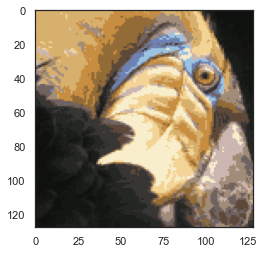

In [55]:
plt.imshow(X_recovered)
plt.show()

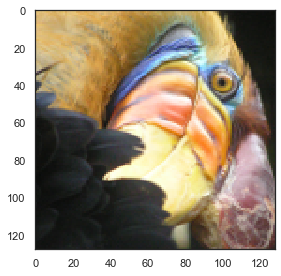

In [58]:
from skimage import io

# cast to float, you need to do this otherwise the color would be weird after clustring
pic = io.imread("E:/andrew machine learning/andrew_ml_ex78376/bird_small.png") / 255.
io.imshow(pic)
plt.show()

In [59]:
pic.shape

(128, 128, 3)

In [60]:
data = pic.reshape(128*128, 3)

In [61]:
from sklearn.cluster import KMeans#导入kmeans库

model = KMeans(n_clusters=16, n_init=100, n_jobs=-1)

In [62]:
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=16, n_init=100, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [63]:
centroids = model.cluster_centers_
print(centroids.shape)

C = model.predict(data)
print(C.shape)

(16, 3)
(16384,)


In [64]:
centroids[C].shape

(16384, 3)

In [65]:
compressed_pic = centroids[C].reshape((128,128,3))

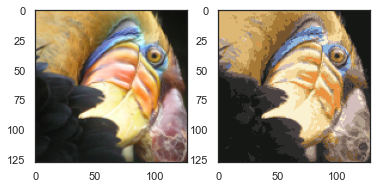

In [66]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(pic)
ax[1].imshow(compressed_pic)
plt.show()